In [1]:
import oritelib as orite 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def calc_kmer_density(kmer_list):
    kmer_list_plus_d = []
    for touple in kmer_list:
        this_kmer = touple[0]
        this_list = touple[1]
        this_occurance = this_list[0]
        start = this_list[1]
        stop = this_list[len(this_list)-1]
        this_density = this_list[0] /((stop-start))
        print("hej")
    return kmer_list_plus_d

In [3]:
class NC_region:
    def __init__(self, start_stop_tuple):
        self.start = int(start_stop_tuple[0])
        self.stop = int(start_stop_tuple[1])
        self.length = (self.stop - self.start) +1
        self.kmer_info = {}
        
    #def __str__(self):
        #return str(self.start)
    
    def add_sequence(self,string):
        self.sequence = string
        
    def add_cgc_val(self,cgc_val):
        self.cgc_val = cgc_val
        
    def add_gc_val(self,gc_val):    
        self.gc_val = gc_val
    
    def add_kmer_counts(self, k):
        kmer_dict = orite.get_kmers(self.sequence, k, circular=False)
        self.kmer_info.update({k: kmer_dict})
    
    def filter_kmer_by_occurence(self, n):
        for key, value in self.kmer_info.items():
            self.kmer_info[key] = orite.get_kmer_by_occurence(value, n)
            
    def filter_top_n_kmers(self, n):
        for key, value in self.kmer_info.items():
            self.kmer_info[key] = orite.get_top_n_kmers(value, n)
    def calc_kmer_density(self):
        for key, value in self.kmer_info.items():
            self.kmer_info[key] = orite.calc_kmer_density(value)
            

In [4]:
def calc_score_for_NC_region(cgc_curve, nc_obj):
    inter = list(range(nc_obj.start, nc_obj.stop+1))
    region_cgc_vals = cgc_curve[inter]
    
    score= -np.average(region_cgc_vals)
    
    nc_obj.add_cgc_val(score)
    

def add_sequence_to_region(seq, nc_obj):
    nc_obj.add_sequence(seq[nc_obj.start:nc_obj.stop +1])





In [5]:
cgc_curve = np.array(list(range(100)))

In [6]:
t1 = (0, 54)
nc1 = NC_region(t1)
seq_dummy = "TATTCCTGGTAAATAAATAATAAATAAATAATAATAATGCGCGCCGCCCGCGCG"#str(list(range(100)))
nc1.add_sequence(seq_dummy)
nc1.add_kmer_counts(3)
nc1.add_kmer_counts(4)

In [7]:
nc1.filter_top_n_kmers(5)


In [8]:
nc1.kmer_info

{3: [('AAT', [8, 11, 15, 18, 22, 26, 29, 32, 35]),
  ('TAA', [8, 9, 13, 17, 20, 24, 28, 31, 34]),
  ('ATA', [7, 12, 16, 19, 23, 27, 30, 33]),
  ('CGC', [5, 39, 41, 44, 48, 50]),
  ('GCG', [4, 38, 40, 49, 51])],
 4: [('ATAA', [7, 12, 16, 19, 23, 27, 30, 33]),
  ('AATA', [7, 11, 15, 18, 22, 26, 29, 32]),
  ('TAAT', [4, 17, 28, 31, 34]),
  ('AAAT', [4, 10, 14, 21, 25]),
  ('TAAA', [4, 9, 13, 20, 24])]}

In [9]:
nc1.calc_kmer_density()

In [10]:
sequence = orite.seq_from_fasta("test_data/AcetomicrobiumMobile.fna")
nc_intervals = orite.genbank_to_non_coding_intervals("test_data/AcetomicrobiumMobile.gbff")[0]
gc, cgc = orite.gc_skew_sliding_window(sequence, 250000)

seq len:  2160700
window_rad:  250000
extended seq length:  2660700


In [11]:
nc_objcts = []
for i in range(len(nc_intervals)):
    nc_obj = NC_region(nc_intervals[i])
    add_sequence_to_region(sequence, nc_obj)
    calc_score_for_NC_region(cgc, nc_obj)
    nc_objcts.append(nc_obj)

In [12]:
print(nc_objcts[1].cgc_val)

-7.733858321926003


In [13]:
region_pos = []
region_score = []

for region in nc_objcts:
    region_pos.append(region.start)
    region_score.append(region.cgc_val)

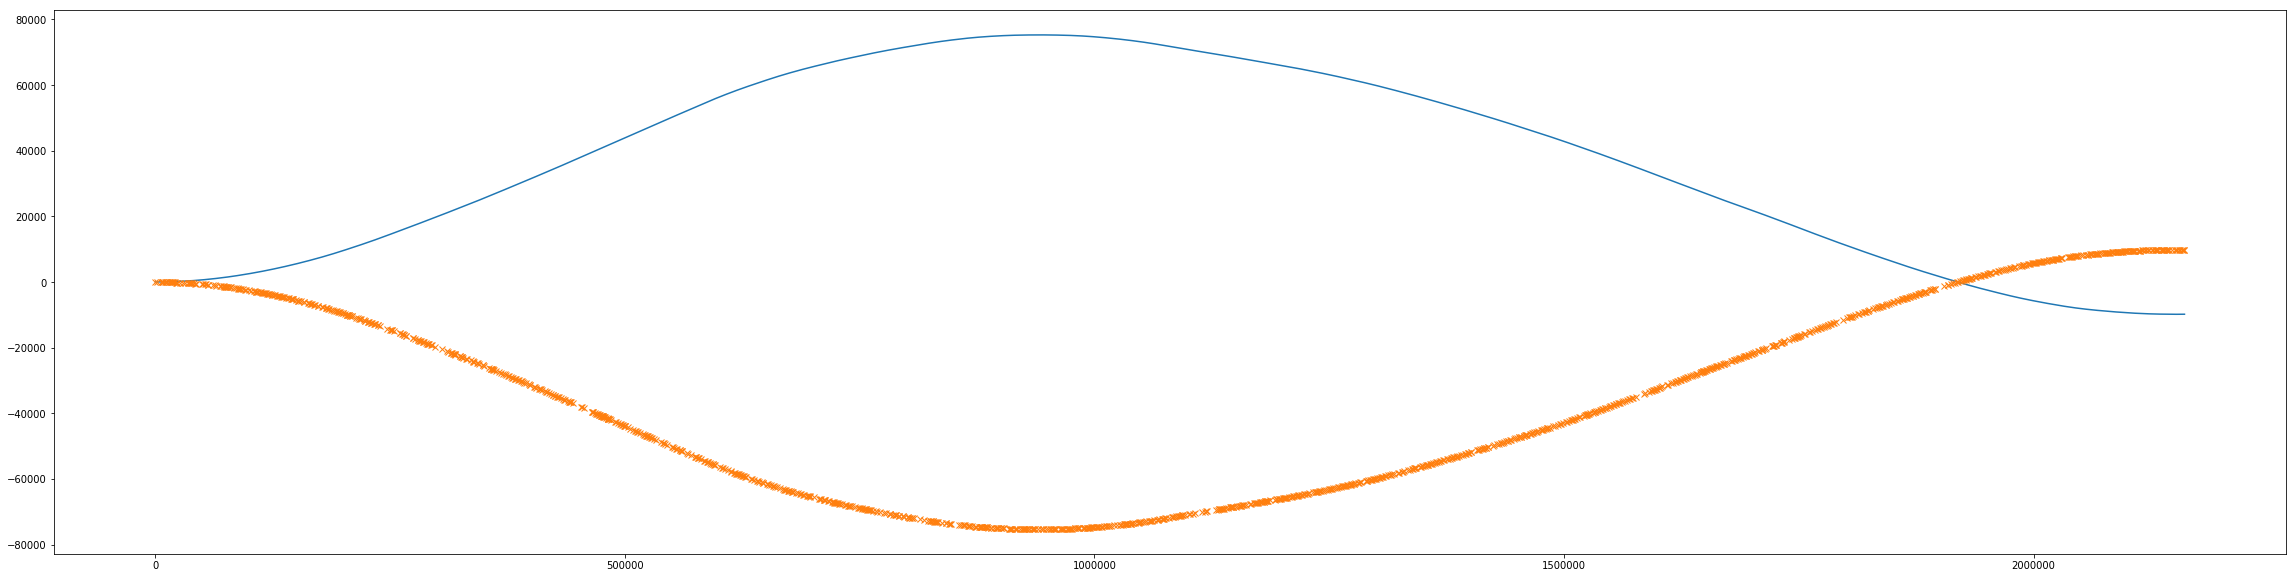

In [14]:
plt.figure(figsize=[40,10])
plt.plot(cgc)

plt.plot(region_pos, region_score, 'x')

In [15]:
region_lengths = []
for region in nc_objcts:
    region_lengths.append(region.length)

In [16]:
def filter_regions_by_length(regions_list, length):
    new_region_list = []
    
    for region in regions_list:
        if region.length > length:
            new_region_list.append(region)
    return new_region_list

In [17]:
filtered_nc_objcts = filter_regions_by_length(nc_objcts, 27)

In [18]:
for region in filtered_nc_objcts:
    print(region.cgc_val)

-0.5079480009889862
-7.733858321926003
-35.51905100513652
-41.09478393256883
-44.256516864472644
-50.16322367819028
-74.53830745605917
-94.88462503400916
-107.50401809053494
-113.53116002189259
-124.62749140598292
-133.43387207622956
-144.48696770568932
-159.6136225356262
-243.29126079498604
-280.63609539459395
-316.87398984135854
-365.74831190487134
-378.52045264018426
-396.9201663087034
-413.44042559724164
-458.2859125606171
-486.9067577860651
-644.4908955552215
-806.8132789660675
-826.7078341890917
-1032.3330869363813
-1073.0699373319292
-1232.025751937626
-1343.836711746348
-1395.3351090665199
-1404.068455118532
-1455.5316875386916
-1472.47850402052
-1487.261902607114
-1539.0763410062273
-1625.2002867604506
-1666.443584534005
-1799.3013932103684
-1902.7046713057462
-1972.794983845331
-1987.3256935370218
-2055.2543354633144
-2068.78192142414
-2120.0543584138154
-2326.0645975113725
-2357.973379369033
-2537.310573103992
-2607.450893193934
-2906.9587540900707
-2925.036268548648
-2976.3

In [19]:

'''
Sorts a regions_list by each region objects score attribute.
NOTE: 
THIS FUNCTION OPERATES ON THE INPUTED region_list itself. 
It doesnt return anything.
'''


def sort_regions_by_score(regions_list):
    regions_list.sort(key=lambda x: x.cgc_val, reverse = True)
    #regions_list.sort(reversed = True)

In [20]:
sort_regions_by_score(filtered_nc_objcts)

In [21]:
'''

input: list of regions with score value

sort by score
filter top n by score 

return 
output: so

'''

'\n\ninput: list of regions with score value\n\nsort by score\nfilter top n by score \n\nreturn \noutput: so\n\n'